In [4]:
’import pandas as pd
import numpy as np
import math,copy,os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from pathlib import Path
from Measure import measure_final_score
import statistics
from CatEncoder import *
import glob
import pickle

In [5]:

def get_results(path_name):
    path = r'/Users/germainherbay/PycharmProjects/Blind/adult/score/directed/sex_recover/'+path_name+'/' # use your path
    all_files = glob.glob(path + "/*.csv")
    first_df = pd.read_csv(all_files[0])
    first_df['name'] = Path(all_files[0]).name
    first_df['Gender & Income redistribution'] = str(int(path_name) * 10)+"%"
    #first_df['operator'] = path_name
    for filename in all_files[1:]:
        df = pd.read_csv(filename)
        df['name'] = Path(filename).name
        df['Gender & Income redistribution'] = str(int(path_name) * 10)+"%"
        #df['operator'] = path_name
        first_df = first_df.append(df)
    first_df['model'] = first_df['model'].replace(['LogisticRegression()','RandomForestClassifier()', 'SVC()', 'MLPClassifier()'],['LR','RF','SVC', 'MLPC'])
    first_df.rename(columns = {'protected_att':'PA'}, inplace = True)
    return first_df

operators = ['1', '2', '3', '4', '5', '6', '7', '8',
             '9', '10']

def get_all_results(operators, PA):
    df_1 = get_results(operators[0])
    df_1 = df_1[df_1["PA"] == PA]
    for operator in operators[1:]:
        df = get_results(operator)
        df = df[df["PA"] == PA]
        df_1 = df_1.append(df)
    return df_1

df = get_all_results(operators, 'sex')
df=df.reset_index()
print(df)

     index   PA model  recall  accuracy  precision   eod   SPD  \
0        0  sex    LR    0.56      0.84       0.73  0.19  0.20   
1        1  sex    RF    0.59      0.83       0.69  0.07  0.18   
2        2  sex   SVC    0.56      0.85       0.76  0.11  0.17   
3        3  sex  MLPC    0.55      0.85       0.78  0.07  0.16   
4        0  sex    LR    0.56      0.84       0.73  0.19  0.20   
..     ...  ...   ...     ...       ...        ...   ...   ...   
195      3  sex  MLPC    0.50      0.84       0.79  0.04  0.12   
196      0  sex    LR    0.52      0.84       0.75  0.06  0.15   
197      1  sex    RF    0.55      0.83       0.72  0.04  0.14   
198      2  sex   SVC    0.51      0.84       0.78  0.06  0.12   
199      3  sex  MLPC    0.49      0.84       0.80  0.08  0.10   

                    name Gender & Income redistribution  
0     sex_recover1_4.csv                            10%  
1     sex_recover1_4.csv                            10%  
2     sex_recover1_4.csv         

<AxesSubplot:xlabel='Gender & Income redistribution', ylabel='SPD'>

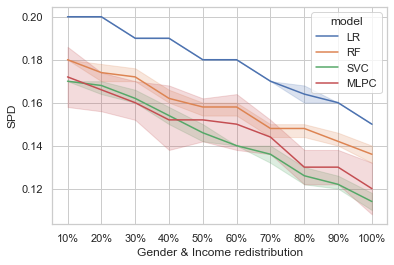

In [6]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Gender & Income redistribution", y="SPD", hue="model")

<AxesSubplot:xlabel='Gender & Income redistribution', ylabel='eod'>

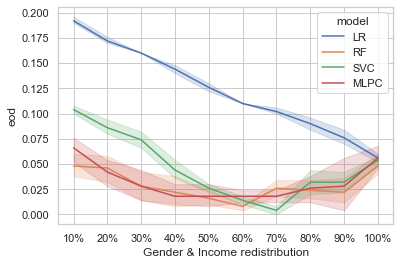

In [7]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Gender & Income redistribution", y="eod", hue="model")


<AxesSubplot:xlabel='Gender & Income redistribution', ylabel='recall'>

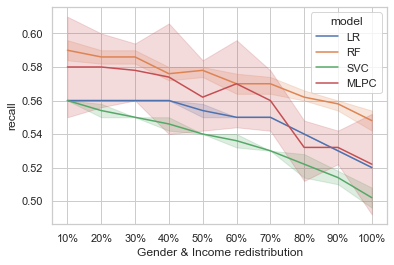

In [8]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Gender & Income redistribution", y="recall", hue="model")

<AxesSubplot:xlabel='Gender & Income redistribution', ylabel='accuracy'>

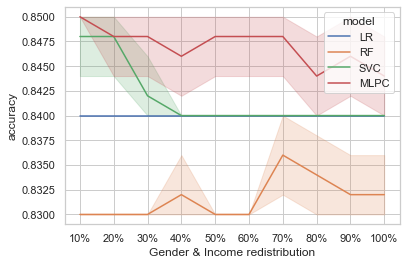

In [9]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Gender & Income redistribution", y="accuracy", hue="model")

<AxesSubplot:xlabel='Gender & Income redistribution', ylabel='precision'>

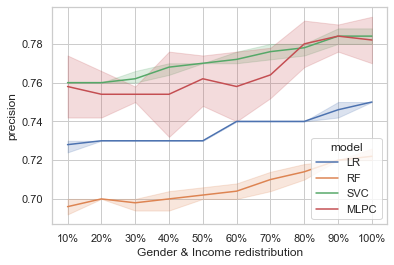

In [10]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Gender & Income redistribution", y="precision", hue="model")

Gender and Income distribution

Income  <=50K  >50K
sex                
Female   88.6  11.4
Male     68.8  31.2


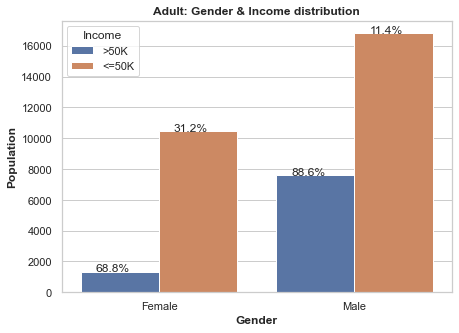

In [11]:
dataset_orig = pd.read_csv(Path(r'/Users/germainherbay/PycharmProjects/Blind/adult/data_preprocess/directed/adult_train.csv'))
df = copy.deepcopy(dataset_orig)
df.rename(index=str, columns={"Probability": "Income"}, inplace=True)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.color_palette("tab10")
plt.figure(figsize=(7, 5))
total = float(len(dataset_orig))
ax = sns.countplot(x="sex", hue="Income", data=df)

var1_var2_ratio=round(pd.crosstab(df["sex"], df["Income"]).div(pd.crosstab(df["sex"], df["Income"]).apply(sum,1),0),3)*100
print(var1_var2_ratio)
for p in [ax.patches[0]]:
    percentage = '{:.1f}%'.format(var1_var2_ratio.iloc[1][0])
    x = p.get_x() + p.get_width() - 0.15
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
for p in [ax.patches[2]]:
    percentage = '{:.1f}%'.format(var1_var2_ratio.iloc[1][1])
    x = p.get_x() + p.get_width() - 0.15
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')

for p in [ax.patches[1]]:
    percentage = '{:.1f}%'.format(var1_var2_ratio.iloc[0][0])
    x = p.get_x() + p.get_width() - 0.15
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
for p in [ax.patches[3]]:
    percentage = '{:.1f}%'.format(var1_var2_ratio.iloc[0][1])
    x = p.get_x() + p.get_width() - 0.15
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')


plt.title('Adult: Gender & Income distribution', size=12, fontweight='bold')
plt.xlabel('Gender', size=12, fontweight='bold')
plt.ylabel('Population', size=12, fontweight='bold')
plt.show()
